In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
from sklearn.linear_model import SGDClassifier

**7.1.1. 論理積**

線形二値分類モデルで論理積（AND）の入出力を学習できるか確認する

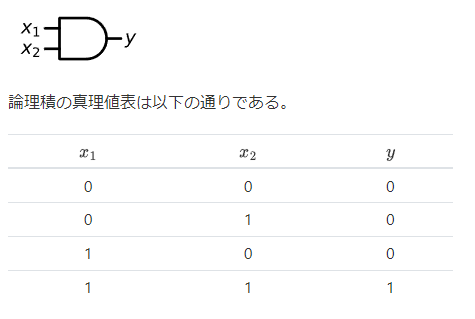

In [40]:
# 入力データの定義
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# 出力データの定義
Y = np.array([0, 0, 0, 1])

# SGDClassifier（確率的勾配降下法）のインスタンスを作成し、損失関数を'log'（ロジスティック回帰）に設定
mAND = SGDClassifier(loss='log')

print(X)

# ロジスティック回帰モデルの学習
mAND.fit(X, Y)

# 学習したモデルで入力データXに対して予測を行う
mAND.predict(X)


[[0 0]
 [0 1]
 [1 0]
 [1 1]]


/home/buntin/jupyterlab/lib64/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


array([0, 1, 1, 1])

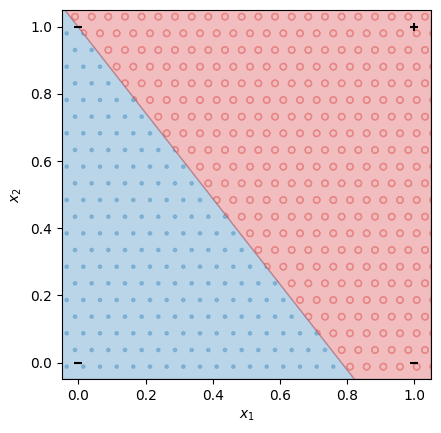

'x1を横軸、x2を縦軸\n   y^=0と予測する領域が青、y^=1が赤'

In [41]:
def draw_decision_area(ax, model, X, vmin, vmax):
  """
  ロジスティック回帰モデルの決定領域を描画する関数。

  Parameters:
      ax (matplotlib.axes.Axes): 描画対象のAxesオブジェクト
      model : 学習済みのロジスティック回帰モデル
      X (ndarray): X軸の値の配列
      vmin (float): Y軸の最小値
      vmax (float): Y軸の最大値
  """
  # モデルの重みとバイアスを取得
  w1, w2 = model.coef_[0]
  bias = model.intercept_[0]

  # 決定領域の境界を計算
  a = -w1 / w2
  b = -bias / w2

  # 決定領域の描画
  if bias <= 0:
    ax.fill_between(X, vmin, a * X + b, color='tab:blue', hatch='.', alpha=0.3)
    ax.fill_between(X, a * X + b, vmax, color='tab:red', hatch='o', alpha=0.3)
  else:
    ax.fill_between(X, vmin, a * X + b, color='tab:red', hatch='o', alpha=0.3)
    ax.fill_between(X, a * X + b, vmax, color='tab:blue', hatch='.', alpha=0.3)


def draw_points(ax, Xp, Yp):
  '''
  データポイントを描画する関数。
      ax (matplotlib.axes.Axes): 描画対象のAxesオブジェクト
      Xp (ndarray): X軸の値の配列
      Yp (ndarray): Y軸の値の配列（クラスラベル）
  '''
  # データポイントの描画
  colors = np.array(["tab:blue", "tab:red"])
  I = np.where(Yp == 0)
  ax.scatter(Xp[I, 0], Xp[I, 1], c='black', marker='_')
  I = np.where(Yp == 1)
  ax.scatter(Xp[I, 0], Xp[I, 1], c='black', marker='+')


def show_decisions(model, Xp, Yp, N=400):
  '''
  ロジスティック回帰モデルの決定領域を表示する関数。
      model : 学習済みのロジスティック回帰モデル
      Xp (ndarray): 入力データの特徴量行列
      Yp (ndarray): クラスラベルの配列
      N (int): 描画の詳細度（X軸のデータ点数）
  '''
  vmin = -0.05
  vmax = 1.05
  # プロットの設定
  fig, ax = plt.subplots(dpi=100)
  ax.set_aspect('equal')
  ax.set_xlabel('$x_1$')
  ax.set_ylabel('$x_2$')
  ax.set_xlim(vmin, vmax)
  ax.set_ylim(vmin, vmax)

  # X軸の値の配列を生成
  X = np.linspace(vmin, vmax, N)

  # 決定領域の描画
  draw_decision_area(ax, model, X, vmin, vmax)

  # データポイントの描画
  draw_points(ax, Xp, Yp)

  # グラフの表示
  plt.show()


show_decisions(mAND, X, Y)

'''x1を横軸、x2を縦軸
   y^=0と予測する領域が青、y^=1が赤'''


論理和に対しても同様に確かめてみる

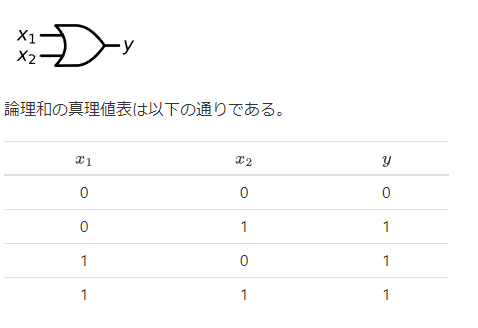

/home/buntin/jupyterlab/lib64/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


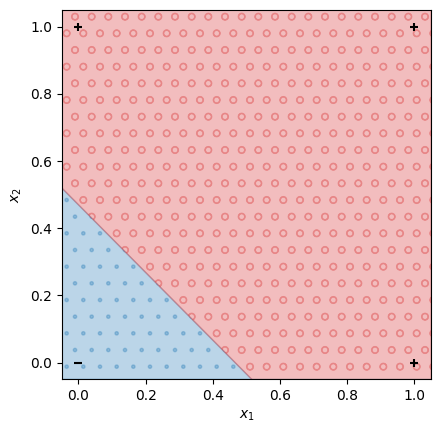

In [42]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 1, 1, 1])
mOR = SGDClassifier(loss='log')
mOR.fit(X, Y)

mOR.predict(X)

show_decisions(mOR, X, Y)


否定も

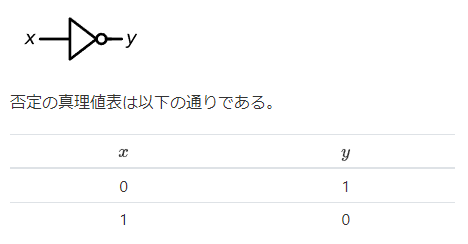

/home/buntin/jupyterlab/lib64/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[1 0]


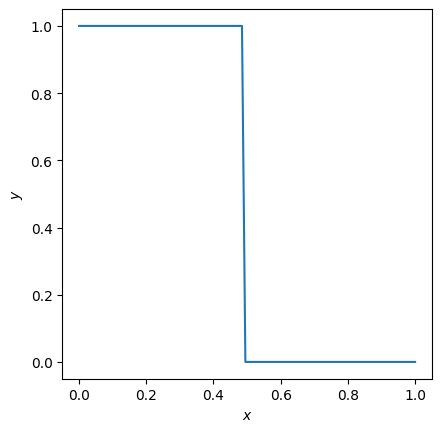

In [43]:
X = np.array([[0], [1]])
Y = np.array([1, 0])
mNOT = SGDClassifier(loss='log')
mNOT.fit(X, Y)

print(mNOT.predict(X))

N = 100
X = np.linspace(0, 1, N).reshape(N, -1)
P = mNOT.predict(X)

'''入力を横軸,出力を横軸'''

fig, ax = plt.subplots(dpi=100)
ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.plot(X, P)
plt.show()


否定論理積も

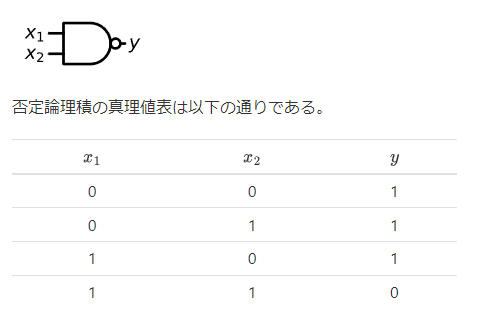

/home/buntin/jupyterlab/lib64/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[1 1 1 0]


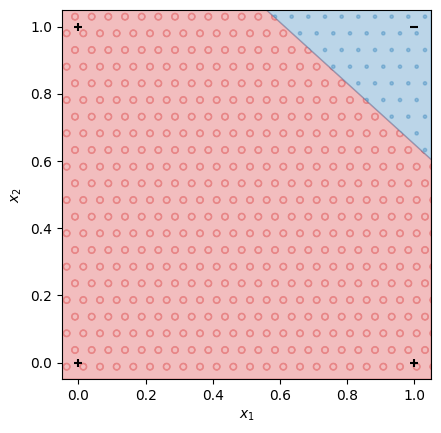

In [44]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([1, 1, 1, 0])
mNAND = SGDClassifier(loss='log')
mNAND.fit(X, Y)

print(mNAND.predict(X))

show_decisions(mNAND, X, Y)


排他的論理和は？

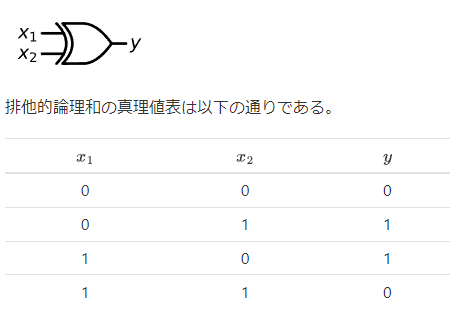

/home/buntin/jupyterlab/lib64/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[0 0 0 0]


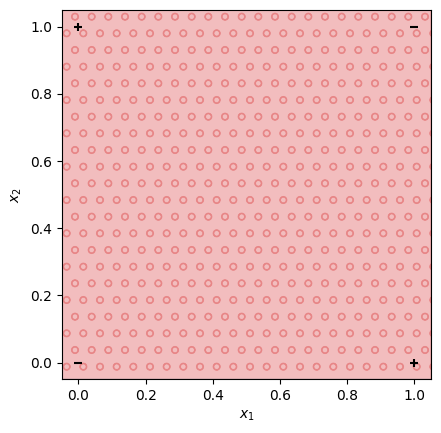

In [45]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 1, 1, 0])
mXOR = SGDClassifier(loss='log')
mXOR.fit(X, Y)

print(mXOR.predict(X))

show_decisions(mXOR, X, Y)


**7.1.6 線形分離可能・不能**

簡単にいうと、x1とx2の2入力の線形二値分類モデルを学習することは、x1とx2の値を使用して直線を求め、その直線によってデータポイントを分離することに相当するということ

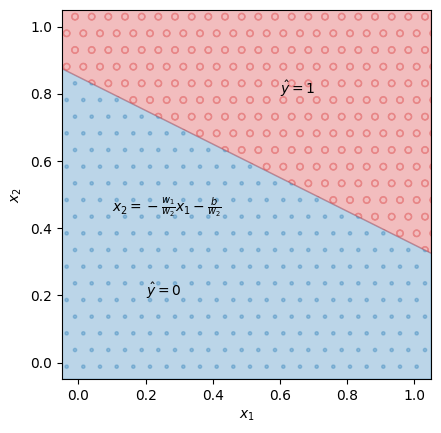

In [46]:
class Model:
    pass


model = Model()
model.coef_ = np.array([[1., 2.]])
model.intercept_ = np.array([-1.7])

N = 400
vmin = -0.05
vmax = 1.05
fig, ax = plt.subplots(dpi=100)
ax.set_aspect('equal')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_xlim(vmin, vmax)
ax.set_ylim(vmin, vmax)
X = np.linspace(vmin, vmax, N)
draw_decision_area(ax, model, X, vmin, vmax)

ax.text(0.6, 0.8, '$\hat{y} = 1$')
ax.text(0.2, 0.2, '$\hat{y} = 0$')
ax.text(0.1, 0.45, r'$x_2 = -\frac{w_1}{w_2}x_1 -\frac{b}{w_2}$')
plt.show()


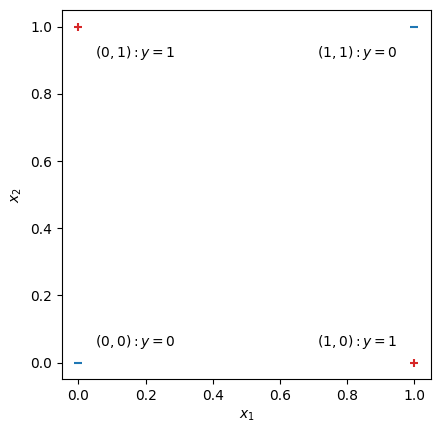

In [47]:
X = np.linspace(0, 1, 100)
Y = -0.4 * X + 0.7

fig, ax = plt.subplots(dpi=100)
ax.set_aspect('equal')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
ax.scatter([0, 1], [0, 1], c='tab:blue', marker='_')
ax.scatter([0, 1], [1, 0], c='tab:red', marker='+')
ax.text(0.05, 0.05, r'$(0, 0): y = 0$')
ax.text(0.05, 0.95, r'$(0, 1): y = 1$', va='top')
ax.text(0.95, 0.05, r'$(1, 0): y = 1$', ha='right')
ax.text(0.95, 0.95, r'$(1, 1): y = 0$', va='top', ha='right')
plt.show()


**7.1.7. 線形二値分類を多段にする**

1.入力に対して論理和をとる

2.入力に対して否定論理積をとる

3.1と2に対して論理積をとる

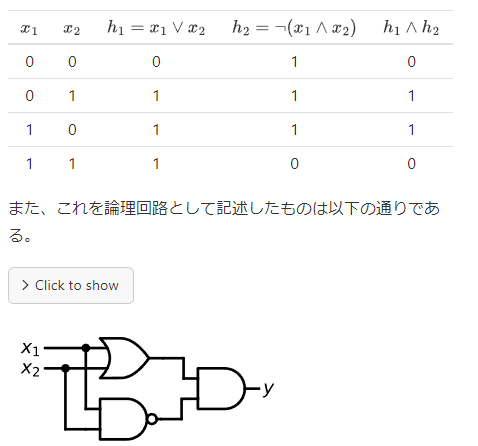

In [48]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 1, 1, 0])
h1 = mOR.predict(X)
h2 = mNAND.predict(X)
mAND.predict(np.array([h1, h2]).T)


array([1, 1, 1, 1])

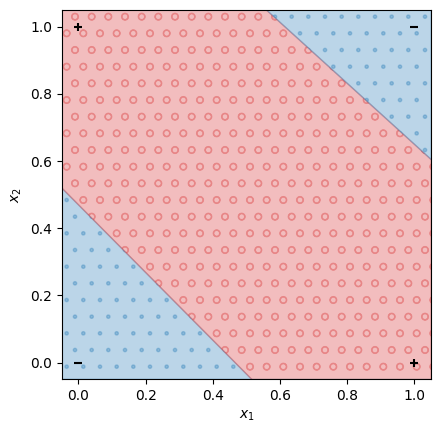

In [49]:
N = 400
vmin = -0.05
vmax = 1.05

X0 = np.linspace(vmin, vmax, N)
w1, w2 = mOR.coef_[0]
bias = mOR.intercept_[0]
a = -w1 / w2
b = -bias / w2
Y1 = a * X0 + b

w1, w2 = mNAND.coef_[0]
bias = mNAND.intercept_[0]
a = -w1 / w2
b = -bias / w2
Y2 = a * X0 + b

fig, ax = plt.subplots(dpi=100)
ax.set_aspect('equal')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_xlim(vmin, vmax)
ax.set_ylim(vmin, vmax)
ax.fill_between(X0, vmin, Y1, color='tab:blue', hatch='.', alpha=0.3)
ax.fill_between(X0, Y1, Y2, color='tab:red', hatch='o', alpha=0.3)
ax.fill_between(X0, Y2, vmax, color='tab:blue', hatch='.', alpha=0.3)
draw_points(ax, X, Y)
plt.show()


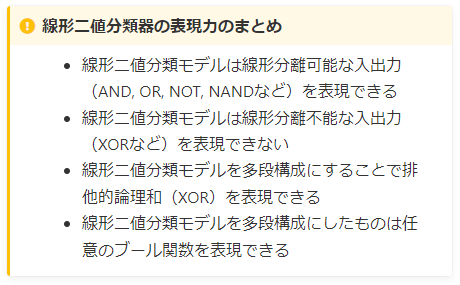

**7.2.1.1. 活性化関数**

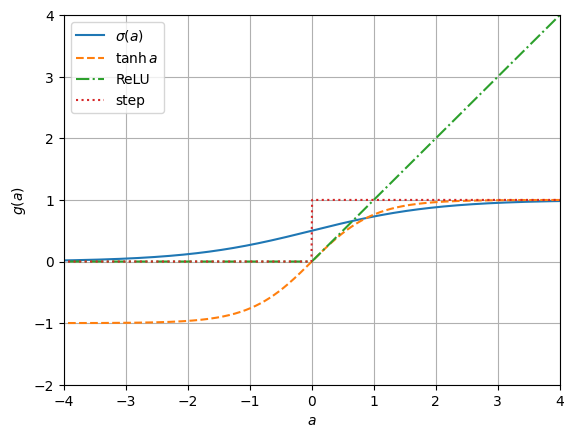

In [50]:
fig, ax = plt.subplots(dpi=100)
x = np.linspace(-5, 5, 1000)
ax.plot(x, 1 / (1 + np.exp(-x)), label='$\sigma(a)$', ls='-')
ax.plot(x, (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x)), label=r'$\tanh a$', ls='--')
ax.plot(x, np.maximum(x, 0), label='ReLU', ls='-.')
ax.plot(x, np.heaviside(x, 0), label='step', ls=':')
ax.set_xlabel('$a$')
ax.set_ylabel('$g(a)$')
ax.set_xlim(-4, 4)
ax.set_ylim(-2, 4)
ax.legend()
ax.grid()
plt.show()


**7.2.2.1. XORを実現する2層のニューラルネットワークの構成例**

In [51]:
import numpy as np

# 1層目の重み行列とバイアス
w_xh = np.array([
    [1, -1],
    [1, -1]
])
b_xh = np.array([-0.5, 1.5])

# 2層目の重み行列とバイアス
w_hy = np.array([1, 1])
b_hy = np.array([-1.5])

# 入力データ
x = np.array([1, 1])

# 1層目の計算（中間層の出力）
h = np.heaviside(x @ w_xh + b_xh, 0)

# 2層目の計算（出力）
y = np.heaviside(h @ w_hy + b_hy, 0)

print("x:", x)
print("h:", h)
print("y:", y)

# 入力データのバッチ処理
x = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# 1層目の計算（中間層の出力）
h = np.heaviside(x @ w_xh + b_xh, 0)

# 2層目の計算（出力）
y = np.heaviside(h @ w_hy + b_hy, 0)

print("x:")
print(x)
print("h:")
print(h)
print("y:")
print(y)


x: [1 1]
h: [1. 0.]
y: [0.]
x:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
h:
[[0. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]]
y:
[0. 1. 1. 0.]


**7.3. 万能近似定理**

In [52]:
def f(x, v, w, b):
  def sigmoid(x):
    return np.exp(-np.logaddexp(0, -x))
  return np.dot(sigmoid(np.outer(x, w) + b), v)


**7.3.1. wを動かす**

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML


def f(x, v, w, b):
  def sigmoid(x):
    # シグモイド関数の定義
    return np.exp(-np.logaddexp(0, -x))

  # 外積とバイアスの和をシグモイド関数に入力し、重みベクトルとの内積を計算
  return np.dot(sigmoid(np.outer(x, w) + b), v)


def init_graph(xmin, xmax, ymin, ymax):
  # グラフの初期化
  fig, ax = plt.subplots(dpi=150)

  # x軸の範囲と目盛りの設定
  ax.set_xlim(xmin, xmax)
  ax.set_xticks(range(xmin, xmax+1, 2))
  ax.set_xticks(range(xmin, xmax+1, 1), minor=True)

  # y軸の範囲と目盛りの設定
  ax.set_ylim(ymin, ymax)

  # グリッドを表示
  ax.grid()

  return fig, ax


xmin, xmax = -10, 10
X = np.linspace(xmin, xmax, 1000)

v = np.array([1.])
b = np.array([0.])
WP = np.arange(-8, 9)

fig, ax = init_graph(xmin, xmax, -0.5, 1.5)

A = []
for wp in WP:
  artists = []

  # グラフをプロットし、アーティストとして追加
  artists += ax.plot(X, f(X, v, 2. ** wp, b), color='tab:blue')

  # グラフ上にテキストを追加
  artists.append(ax.text(0, -0.4, f'$w = 2^{{ {wp} }}$', ha='center'))

  A.append(artists)

# アニメーションを作成
ani = animation.ArtistAnimation(fig, A, interval=200)

# アニメーションをHTML形式に変換
html = ani.to_jshtml()
plt.close(fig)

# HTMLを表示
HTML(html)


**7.3.2. bを動かす**

In [54]:
v = np.array([1.])
B = np.arange(-8, 9)
w = np.array([1.])

fig, ax = init_graph(xmin, xmax, -0.5, 1.5)

A = []
for b in B:
  artists = []
  artists += ax.plot(X, f(X, v, w, b), color='tab:blue')
  artists.append(ax.axvline(-b, ls=':'))
  artists.append(ax.text(0, -0.4, f'$b = {b}$', ha='center'))
  A.append(artists)

ani = matplotlib.animation.ArtistAnimation(fig, A, interval=200)
html = ani.to_jshtml()
plt.close(fig)
HTML(html)


**7.3.3. vを動かす**

In [55]:
b = 0.
w = 1.
v = 1.
V = np.arange(-8., 8)

ymin, ymax = -10, 10
fig, ax = init_graph(xmin, xmax, ymin, ymax)
ax.set_yticks(range(ymin, ymax+1, 2))
ax.set_yticks(range(ymin, ymax+1, 1), minor=True)

A = []
for v in V:
  artists = []
  artists += ax.plot(X, f(X, v, w, b), color='tab:blue')
  artists.append(ax.text(0, -9, f'$v = {v}$', ha='center'))
  A.append(artists)

ani = matplotlib.animation.ArtistAnimation(fig, A, interval=200)
html = ani.to_jshtml()
plt.close(fig)
HTML(html)


**7.3.4. 矩形の合成**

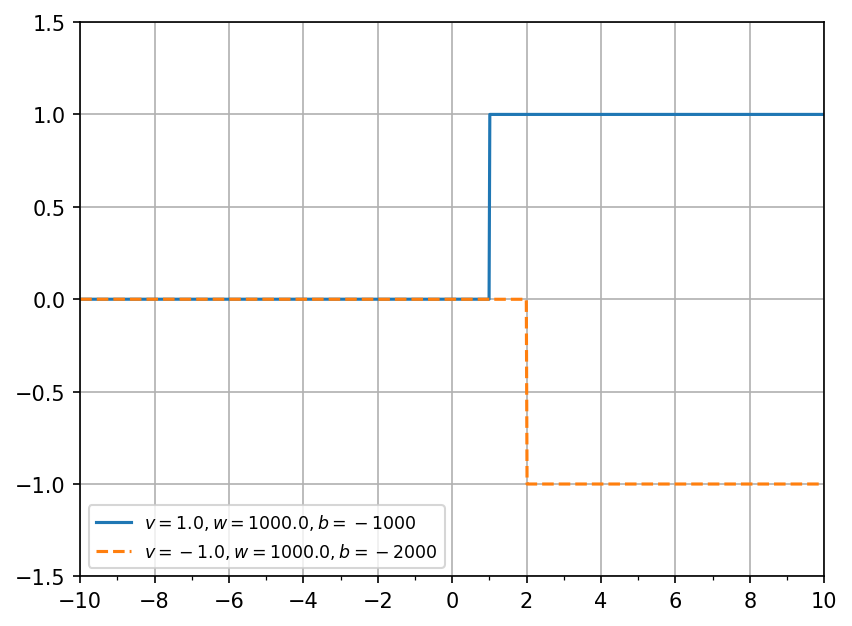

In [56]:
params = [
    # v, w, b, ls
    [1., 1000., -1000, '-'],
    [-1., 1000., -2000, '--'],
]

fig, ax = init_graph(xmin, xmax, -1.5, 1.5)
for v, w, b, ls in params:
  ax.plot(X, f(X, v, w, b), ls=ls, label=f'$v = {v}, w = {w}, b = {b}$')
ax.legend(fontsize='small', loc='lower left')
plt.show()


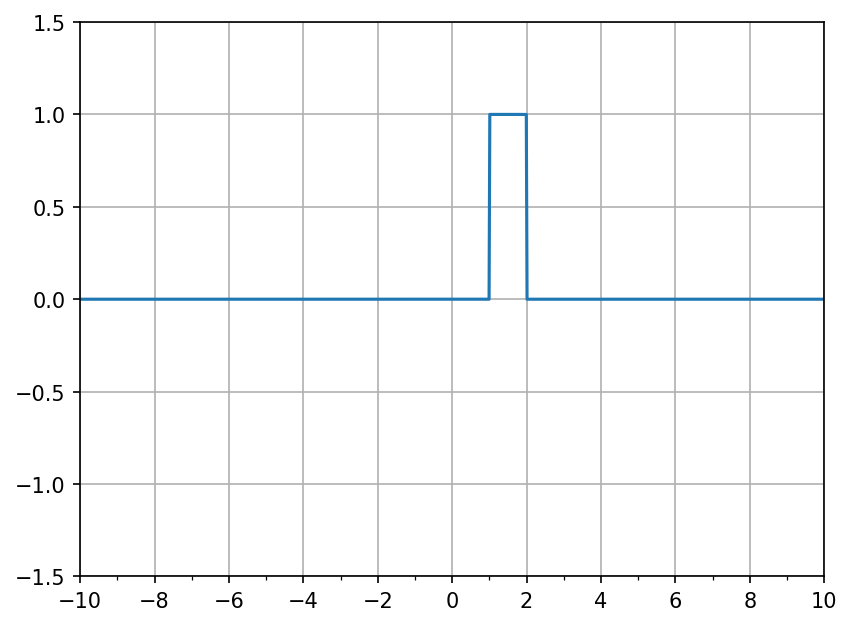

In [57]:
v = np.array([1, -1])
w = np.array([1000, 1000])
b = np.array([-1000, -2000])

fig, ax = init_graph(xmin, xmax, -1.5, 1.5)
ax.plot(X, f(X, v, w, b))
plt.show()


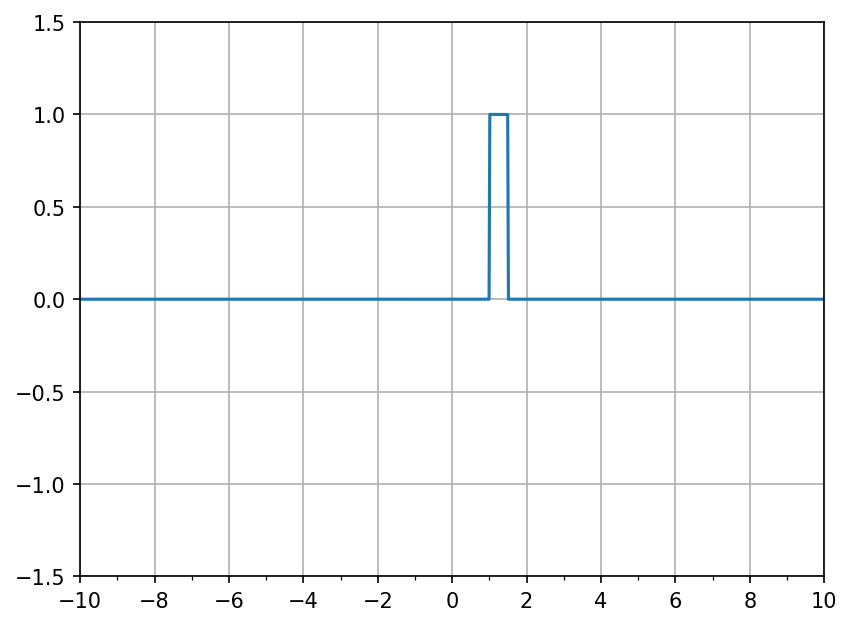

In [58]:
v = np.array([1, -1])
w = np.array([1000, 1000])
b = np.array([-1000, -1500])

fig, ax = init_graph(xmin, xmax, -1.5, 1.5)
ax.plot(X, f(X, v, w, b))
plt.show()


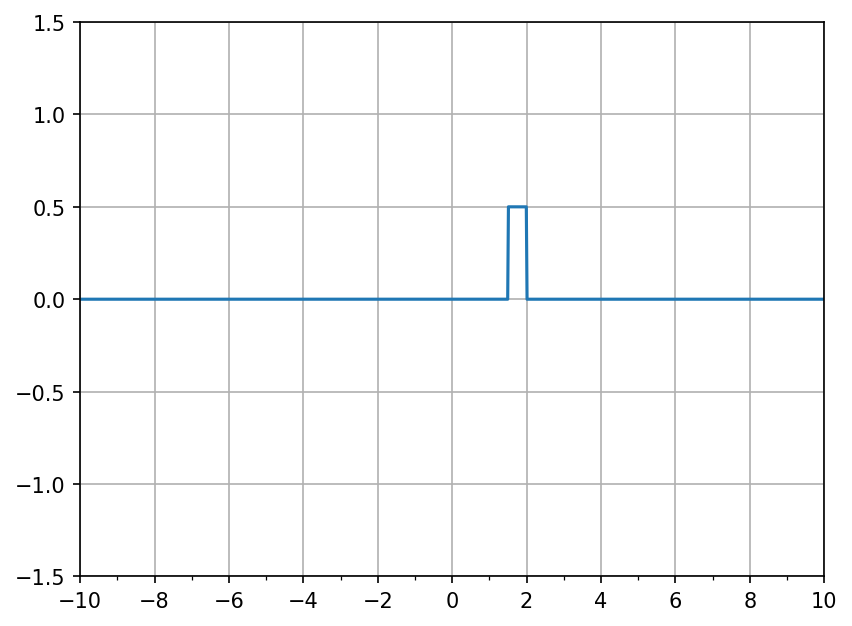

In [59]:
v = np.array([0.5, -0.5])
w = np.array([1000, 1000])
b = np.array([-1500, -2000])

fig, ax = init_graph(xmin, xmax, -1.5, 1.5)
ax.plot(X, f(X, v, w, b))
plt.show()


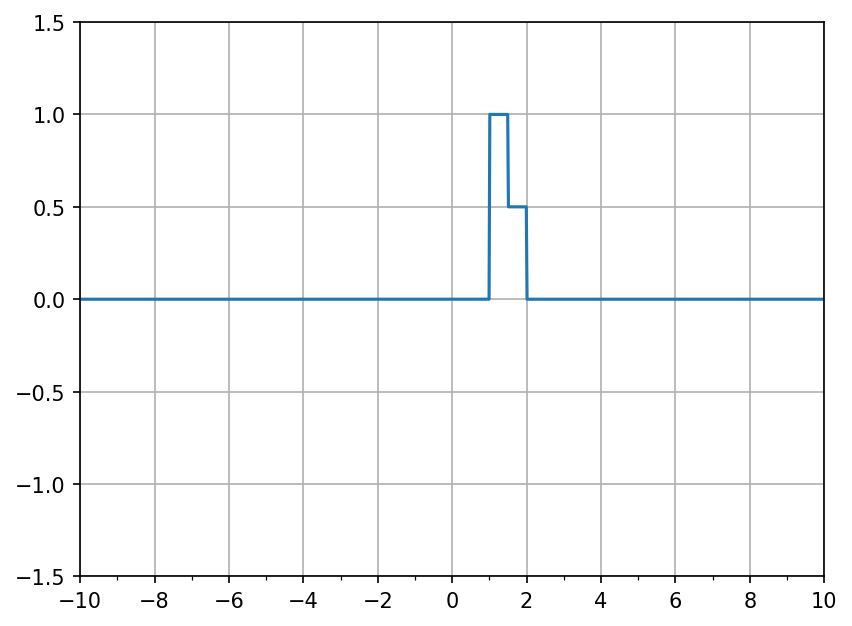

In [60]:
v = np.array([1, -1, 0.5, -0.5])
w = np.array([1000, 1000, 1000, 1000])
b = np.array([-1000, -1500, -1500, -2000])

fig, ax = init_graph(xmin, xmax, -1.5, 1.5)
ax.plot(X, f(X, v, w, b))
plt.show()


**7.4. 確認問題**

In [61]:
def G(x):
  if -5 <= x < 4:
    i = int(x + 5)
    return [-1, 0, 1, 0, -1, 1, 0, 1, -1][i]
  else:
    return 0


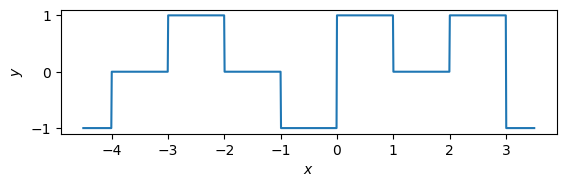

In [62]:
import numpy as np
import matplotlib.pyplot as plt


def plot(ax, f):
  X = np.linspace(-4.5, 3.5, 1000)
  Y = f(X)

  ax.plot(X, Y, '-')
  ax.set_xlabel('$x$')
  ax.set_ylabel('$y$')
  ax.set_aspect('equal')


fig, ax = plt.subplots()
g = np.vectorize(G)
plot(ax, g)
plt.show()


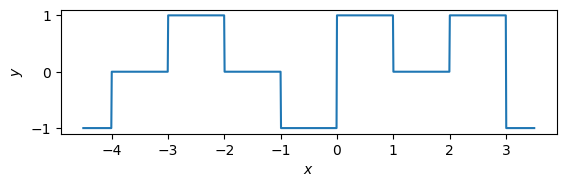

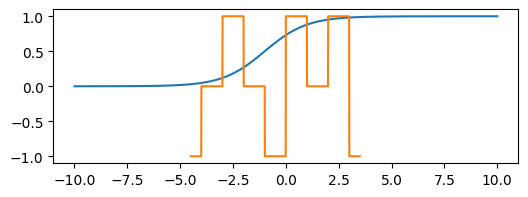

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ブール関数Gの定義


def G(x):
  if -5 <= x < 4:
    i = int(x + 5)
    return [-1, 0, 1, 0, -1, 1, 0, 1, -1][i]
  else:
    return 0

# プロット補助関数の定義


def plot(ax, f):
  X = np.linspace(-4.5, 3.5, 1000)
  Y = f(X)

  # 関数をプロット
  ax.plot(X, Y, '-')
  ax.set_xlabel('$x$')
  ax.set_ylabel('$y$')
  ax.set_aspect('equal')


# グラフ描画の設定
fig, ax = plt.subplots()

# G(x)のプロット
g = np.vectorize(G)
plot(ax, g)
plt.show()

# ニューラルネットワーク関数Fの定義


def F(x, v, w, b):
  def sigmoid(x):
    return np.exp(-np.logaddexp(0, -x))
  return np.dot(sigmoid(np.outer(x, w) + b), v)


# F(x)のプロット
X = np.linspace(-10, 10, 1000)
pd.Series(F(X, np.array([1]), np.array([1]), np.array([1])), index=X).plot.line()

# パラメータの設定
w = 1e+6
B = [5, 4, 3, 2, 1, 0, -1, -2, -3]
B = np.array(B) * w
V = [-1, 1, 1, -1, -1, 2, -1, 1, -2]

# G(x)とF(x)の比較
X = np.linspace(-4.5, 3.5, 1000)
pd.Series(F(X, V, w, B), index=X).plot.line(figsize=(6, 2))

# G(x)とF(x)の結果の比較
np.testing.assert_allclose(F(X, V, w, B), [G(x) for x in X])
